<a href="https://colab.research.google.com/github/J1Hyeongeun/KISIA/blob/main/%EC%8B%9C%EC%8A%A4%ED%85%9C_%EC%84%A4%EA%B3%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 분석기획


해당 프로젝트는 1912년 타이타닉호에 탑승했던 탑승객 중 일부 데이터 (생존여부 포함) 를 학습하여, 생존에 기여한 데이터 특성을 발견하고, 학습에 사용되지 않은 테스트 데이터에  대하여 생존율 예측을 90% 이상의 정확도를 가지는 머신러닝 모델 개발을 목표로 한다.  
별도의 도메인 지식은 필요하지 않으며 프로젝트상 리스크는 특별히 존재하지 않는다.

# 2. 데이터 준비

해당 프로젝트에서는 별도의 데이터 수집단계를 거치지 않으며, 분석에 필요한 데이터가 주어진 것을 가정한다.  
(실제 인공지능 시스템 구현 프로젝트에서는 분석기획에 따라 장기간 데이터의 축적/레이블링이 선행되어야 할 수 있다.)


### 라이브러리 Import

In [2]:
from google.colab import drive
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

### 데이터 로드

In [3]:
# 구글 드라이브 mount
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [80]:
# 데이터 파일 로드
colab_path = "gdrive/MyDrive/"
df_train = pd.read_csv(colab_path + 'part5_titanic_train.csv')
df_test = pd.read_csv(colab_path + 'part5_titanic_test.csv')
print("학습데이터: {}건, 테스트용데이터: {}건".format(len(df_train), len(df_test)))

학습데이터: 891건, 테스트용데이터: 418건


# 3. 데이터 분석

## 3.1. 분석용 데이터 준비: 전처리




### 데이터 구조 확인

In [46]:
# 데이터 샘플 확인 
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [47]:
# 데이터 dimension 확인
df_train.shape

(891, 12)

In [48]:
# 데이터의 개략적인 정보 확인
# df_train.columns
# df_train.dtypes
# df_train.info()
# df_train.describe()

### Label 변수 확인

In [49]:
# 'Survived' 필드 구성 값 확인
df_train['Survived'].unique()

array([0, 1])

In [50]:
# value_counts()는 Series의 unique value를 count해주는 함수
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [51]:
# value_counts() 결과값을 percent 정보로 변환
(df_train['Survived'].value_counts()/len(df_train)*100).round(2)

0    61.62
1    38.38
Name: Survived, dtype: float64

### 결측치 처리

In [52]:
# 결측치 : 데이터 값이 없는 것 (NA)
# 특이치 : 실제 데이터 값이 특이하게 크거나 작거나, 주로 numeric에서
# 결측치 확인
# df_train.isnull().sum() #결측치의 개수
df_train.isnull().mean()*100 #결측치를 percentage로 확인

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [53]:
# 결측치 처리 - Embarked
# 가장 많이 나온 데이터로 대체
# value_counts는 unique값들의 count를 보여주는데, idxmax()로 그 중 가장 많이 나온 데이터를 반환
# df_train['Embarked'].value_counts()
replace_value = df_train['Embarked'].value_counts(dropna=False).idxmax()
replace_value

'S'

In [54]:
# 결측치 처리(대체) - Embarked
# df_train['Embarked'].isnull()
df_train['Embarked'] = df_train['Embarked'].fillna(replace_value) # replace_value = 'S'

In [55]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
# 결측치 처리 - Age
# 'Age'와의 상관관계가 높은 Feature 확인
df_train.corr(method='pearson')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [57]:
# 결측치 처리 - Age
# 추후 Age가 결측치인 데이터를 필터링하여 추가분석 할 수 있도록 Column 생성
df_train['Age_isna'] = df_train['Age'].isna().astype(int)
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_isna
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [58]:
# 결측치 처리 - Age
# 평균값으로 대체 (mode, median 값 등을 사용할 수도 있음)
replace_value = df_train['Age'].mean().round(2)
replace_value

29.7

In [59]:
# 결측치 처리(대체) - Age
df_train['Age'] = df_train['Age'].fillna(replace_value)

In [36]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_isna
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.7,1,2,W./C. 6607,23.4500,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0


In [85]:
# 결측치 처리 - Cabin
df_cabin_notnull = df_train.dropna(subset=['Cabin'])
for pclass in range(1,4):
    cabin_values = df_cabin_notnull[df_cabin_notnull['Pclass'] == pclass] ['Cabin'].sort_values().value_counts
    print ("Pclass {}에 해당하는 Cabin의 값: {}\n".format(pclass, cabin_values))

Pclass 1에 해당하는 Cabin의 값: <bound method IndexOpsMixin.value_counts of 583    A10
475    A14
556    A16
284    A19
599    A20
      ... 
558    E67
585    E68
724     E8
809     E8
339      T
Name: Cabin, Length: 176, dtype: object>

Pclass 2에 해당하는 Cabin의 값: <bound method IndexOpsMixin.value_counts of 292       D
327       D
473       D
21      D56
123    E101
303    E101
717    E101
772     E77
148      F2
193      F2
340      F2
66      F33
345     F33
516     F33
183      F4
618      F4
Name: Cabin, dtype: object>

Pclass 3에 해당하는 Cabin의 값: <bound method IndexOpsMixin.value_counts of 429      E10
751     E121
823     E121
128    F E69
699    F G63
75     F G73
715    F G73
776      F38
10        G6
205       G6
251       G6
394       G6
Name: Cabin, dtype: object>



In [95]:
# 과제
# cabin 데이터를 가공하여 알파벳 1글자만 남기고
# max 빈도를 갖는 값으로 NA를 대치 하기
# (추가 :pclass 별 max 빈도를 갖는 값으로 대치하기)
'''
df_train['Cabin'] = df_train['Cabin'].str[:1]
df_train.Cabin.value_counts()

for pc in range(1,4):
  mv=df_train[df_train['Pclass'] == pc].Cabin.value_counts().idxmax()
  print("Pclass {}에 해당하는 max 빈도 Cabin의 값: {}\n".format(pc, mv))
  print (df_train[df_train['Pclass'] == pc].Cabin.fillna(mv))
'''
df_train[df_train['Pclass'] == 1].Cabin.fillna("C")

1      C
3      C
6      E
11     C
23     A
      ..
871    D
872    B
879    C
887    B
889    C
Name: Cabin, Length: 216, dtype: object

In [18]:
# 결측치 처리(해당 Feature 제외) - Cabin
df_train = df_train.drop(columns=['Cabin'])

In [19]:
# 결측치 처리 결과 확인
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

### 이상값 처리

In [39]:
# Pclass(등급) unique값  
df_train['Pclass'].value_counts().sort_index()

1    216
2    184
3    491
Name: Pclass, dtype: int64

In [40]:
# Sex(성별) unique값
df_train['Sex'].value_counts().sort_index()

female    314
male      577
Name: Sex, dtype: int64

In [41]:
# SibSp(함께 탑승한 형제자매, 아내, 남편의 수) unique값
df_train['SibSp'].value_counts().sort_index()

0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64

In [42]:
# Parch(함께 탑승한 부모, 자식의 수) unique값
df_train['Parch'].value_counts().sort_index()

0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64

([<matplotlib.axis.XTick at 0x7f8cff656710>,
 [Text(0, 0, 'Age'), Text(0, 0, 'Fare')])

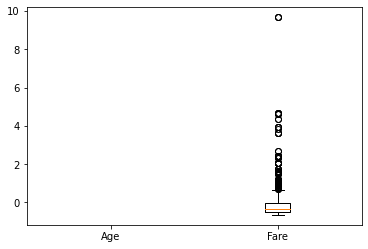

In [109]:
# Age, Fare 값 BoxPlot으로 확인
plt.boxplot([df_train['Age'], df_train['Fare']])
plt.xticks([1,2],['Age', 'Fare'])

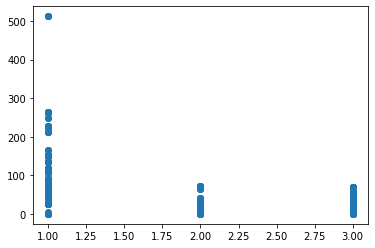

In [97]:
# Fare 데이터 자세히 들여다보기 - Pclass별로
plt.scatter(df_train['Pclass'], df_train['Fare'])

In [98]:
# Fare 데이터 자세히 들여다보기 - 실제 샘플 확인
df_train.sort_values(by=['Fare'], ascending=False).head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_1
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,NaN
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B,C,B
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B,C,B
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C,S,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C,S,C


In [99]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_1
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,C,C


### 데이터 정규화

In [101]:
# Age, Fare에 대해 z-score 정규화
columns_to_scale = ['Age', 'Fare']
scaler_train = preprocessing.StandardScaler()
# 나중에 테스트 데이터에 적용하기 위하여 fit 단계와 transform 단계를 분리한다.
scaler_train = scaler_train.fit(df_train[columns_to_scale])
df_train[columns_to_scale] = scaler_train.transform(df_train[columns_to_scale])
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_1
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.530377,1,0,A/5 21171,-0.502445,NaN,S,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.571831,1,0,PC 17599,0.786845,C,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.254825,0,0,STON/O2. 3101282,-0.488854,NaN,S,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.365167,1,0,113803,0.420730,C,S,C
4,5,0,3,"Allen, Mr. William Henry",male,0.365167,0,0,373450,-0.486337,NaN,S,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,-0.185937,0,0,211536,-0.386671,NaN,S,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,-0.737041,0,0,112053,-0.044381,B,S,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,-0.176263,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,-0.254825,0,0,111369,-0.044381,C,C,C


### 데이터 인코딩

In [102]:
# Sex(성별), Embarked(배에 탑승한 위치) 데이터 인코딩
df_train = pd.get_dummies(df_train, columns = ['Sex', 'Embarked'])
df_train.iloc[:, -5:]

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,0,1
887,1,0,0,0,1
888,1,0,0,0,1
889,0,1,1,0,0


In [103]:
# Ticket 데이터 살펴보기
df_train['Ticket'].sort_values().values[-10:]

array(['W./C. 6607', 'W./C. 6608', 'W./C. 6608', 'W./C. 6608',
       'W./C. 6608', 'W./C. 6609', 'W.E.P. 5734', 'W/C 14208',
       'WE/P 5735', 'WE/P 5735'], dtype=object)

In [104]:
# Name 데이터 살펴보기
df_train['Name'].sort_values().values[:10]

array(['Abbing, Mr. Anthony', 'Abbott, Mr. Rossmore Edward',
       'Abbott, Mrs. Stanton (Rosa Hunt)', 'Abelson, Mr. Samuel',
       'Abelson, Mrs. Samuel (Hannah Wizosky)',
       'Adahl, Mr. Mauritz Nils Martin', 'Adams, Mr. John',
       'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
       'Aks, Mrs. Sam (Leah Rosen)', 'Albimona, Mr. Nassef Cassem'],
      dtype=object)

In [105]:
# Name에 포함된 호칭 추출하여 확인
# 정규표현식은 학습범위를 벗어나므로 결과만을 참고한다.
df_train['Name'].str.extract("([A-Za-z]+)\.").value_counts(dropna=False)

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Mme           1
Ms            1
Capt          1
Lady          1
Jonkheer      1
Don           1
Countess      1
Sir           1
dtype: int64

In [106]:
# 이름에 'Master', 'Dr', 'Rev(목사)', 'Major', 'Col(대령)', 'Capt', 'Jonkheer(귀족)', 'Don', 'Countess(백작)', 'Sir' 포함여부를 Flag화 한다.
df_train['Name_has_title'] = df_train['Name'].str.contains('Master|Dr|Rev|Major|Col|Capt|Jonkheer|Don|Countess|Sir').astype(int)

In [107]:
# Name, Ticket 필드 분석에서 제외
df_train = df_train.drop(columns=['Ticket', 'Name'])

In [108]:
df_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Cabin_1,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Name_has_title
0,1,0,3,-0.530377,1,0,-0.502445,NaN,NaN,0,1,0,0,1,0
1,2,1,1,0.571831,1,0,0.786845,C,C,1,0,1,0,0,0
2,3,1,3,-0.254825,0,0,-0.488854,NaN,NaN,1,0,0,0,1,0
3,4,1,1,0.365167,1,0,0.420730,C,C,1,0,0,0,1,0
4,5,0,3,0.365167,0,0,-0.486337,NaN,NaN,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,-0.185937,0,0,-0.386671,NaN,NaN,0,1,0,0,1,1
887,888,1,1,-0.737041,0,0,-0.044381,B,B,1,0,0,0,1,0
888,889,0,3,NaN,1,2,-0.176263,NaN,NaN,1,0,0,0,1,0
889,890,1,1,-0.254825,0,0,-0.044381,C,C,0,1,1,0,0,0


## 3.2. 텍스트 분석

해당 프로젝트에서는  (3-1. 단계에서 Name 필드로부터 name_has_title Feature를 추출한 정도 외에는) 텍스트 마이닝이 필요할 정도의 비정형 데이터를 포함하지 않아 텍스트 분석 단계를 거치지 않는다. 

## 3.3. 탐색적 분석

### 산포도 분석


In [ ]:
# Pclass에 따른 Survived(사망자/생존자) 분포


In [ ]:
# Pclass에 따른 Survived(사망자/생존자) 분포


### 상관관계 분석

In [ ]:
# 상관관계 계산
cols_to_corr = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Name_has_title']


In [ ]:
# 상관관계 시각화


### 전처리 일괄 실행 함수 만들기

## 3.4. 모델링

In [ ]:
# 전처리 함수 refactoring
def part5_preprocessing(df_orig, mode='train', replace_embarked=None, replace_age=None, scaler=None):
    df = df_orig.copy()

    # 결측치 처리 (훈련 데이터 상에서 파악한 최빈도값/평균값 공통 사용)
    if mode == 'train':
        replace_embarked = df_train['Embarked'].value_counts(dropna=False).idxmax()
        replace_age = df_train['Age'].mean().round(2)
    df['Embarked'] = df['Embarked'].fillna(replace_embarked)
    df['Age_isna'] = df['Age'].isna().astype(int)
    df['Age'] = df['Age'].fillna(replace_age)

    # 이상값 처리 - 없음

    # 데이터 정규화 (훈련 데이터 상에서 학습된 scaler 공통 사용)
    if mode == 'train':
        scaler = preprocessing.StandardScaler()
        scaler = scaler.fit(df[['Age', 'Fare']])
    df[['Age', 'Fare']] = scaler.transform(df[['Age', 'Fare']])

    # 데이터 인코딩
    df = pd.get_dummies(df, columns = ['Sex', 'Embarked'])
    df['Name_has_title'] = df['Name'].str.contains('Master|Dr|Rev|Major|Col|Capt|Jonkheer|Don|Countess|Sir').astype(int)

    # 전처리에 사용된 원본 필드, 분석에 불필요한 필드를 제외시킨다.
    df = df.drop(columns=['Name', 'Ticket', 'Cabin'])
    
    return df, replace_embarked, replace_age, scaler

In [ ]:
# 학습 데이터 전처리 (일괄 적용)
df_train = pd.read_csv(colab_path + 'part5_titanic_train.csv')


In [ ]:
# Feature(X), Label(y) 분리


In [ ]:
# 훈련용/평가용 데이터 분할


In [ ]:
# 모델 1 학습 
from sklearn.linear_model import LogisticRegression


In [ ]:
# 모델 평가


In [ ]:
# 모델 2 학습 및 평가
from sklearn.svm import SVC


In [ ]:
# 모델 3 학습 및 평가
from sklearn.ensemble import RandomForestClassifier


## 3.5. 모델 평가 및 검증

In [ ]:
# ROC Curve 플롯팅
from sklearn.metrics import roc_curve


In [ ]:
# AUC Score
from sklearn.metrics import roc_auc_score


## 3.6. 모델 적용 및 운영방안 수립 (테스트 데이터셋 예측)

In [ ]:
# 모델 저장
# AUC Score 기준 가장 성능이 좋았던 Logistic Regression 모델을 저장한다.

with open(colab_path + 'saved_model.pickle','wb') as fw:
    pickle.dump(model1, fw)

NameError: ignored

In [ ]:
# 모델 로드
with open(colab_path + 'saved_model.pickle','rb') as f:
    model = pickle.load(f)

In [ ]:
# 테스트 데이터 전처리
df_test = pd.read_csv(colab_path + 'part5_titanic_test.csv')



In [ ]:
# 테스트 데이터 중 1건에 'Fare'에 대한 결측치가 존재하므로 결측치를 train 데이터의 평균값으로 대체한다.



In [ ]:
# PassengerId 인덱스화


In [ ]:
# 최종 생존율 예측


# 4. 시스템 구현 (Developing)

해당 프로젝트에서는 시스템 구현 단계는 수행하지 않는다. (전문교육 과정 마지막 프로젝트에서 시스템 구현에 대한 내용을 다룬다.)

# 5. 평가 및 전개 (Deploying)

자신만의 모델 개선